## Практическое занятие 6
## Математический анализ
## Численное решение нелинейных уравнений: nsolve
https://docs.sympy.org/latest/modules/solvers/solvers.html?highlight=nsolve#sympy.solvers.solvers.nsolve

#### Уравнение в форме $f(x)=0$

In [253]:
import numpy as np
import sympy
from sympy import nsolve, Eq
import matplotlib.pyplot as plt
%matplotlib inline

In [254]:
x, y, z = sympy.symbols("x y z")

In [69]:
def withAxis(ax):
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.spines['bottom'].set_position(('data', 0))
    ax.spines['left'].set_position(('data', 0))
    ax.plot(1, 0, ">k", transform=ax.get_yaxis_transform(), clip_on=False)
    ax.plot(0, 1, "^k", transform=ax.get_xaxis_transform(), clip_on=False)

In [274]:
def addPoints(ax, x_coord, y_coord, offset=(0, 0), label="coord"):
    ax.scatter(x_coord, y_coord)
    
    for i, x in enumerate(x_coord):        
        y = y_coord[i]
        
        if label == "coord":
            text = f"({x.round(2)}, {y.round(2)})"
        elif label == "char":
            text = f"A{i + 1}"
        
        ax.annotate(
            text,
            xy=(x, y),
            xycoords='data',
            xytext=(x + offset[0], y + offset[1]), textcoords='data',
            arrowprops=dict(arrowstyle="->",connectionstyle="arc3,rad=0."),
        )

### Задача 1
Решить уравнение $𝑥^4−e^x=0$ при $-2 \le x \le 2$, построить график левой части, отметить точки пересечения с осью ОХ.

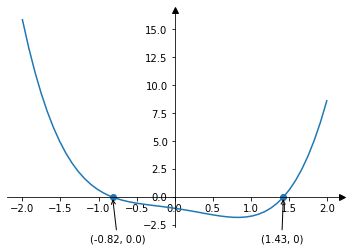

In [280]:
def f(x, lib="sympy"):
    if lib == "sympy":
        return x**4 - sympy.exp(x)
    elif lib == "numpy":
        return x**4 - np.exp(x)

X = np.linspace(-2, 2)
plt.plot(X, f(X, lib="numpy"))

ax = plt.gca()
withAxis(ax)

roots_x = [nsolve(f(x), x0) for x0 in [-1, 1]]
roots_y = [f(root) for root in roots_x]
addPoints(ax, roots_x, roots_y, (-0.3, -4))

### Задача 2.
Решить уравнение $\sin^2(2x)=\ln x$ при $0< x \le 3$. Построить графики левой и правой части, отметить точку пересечения графиков.

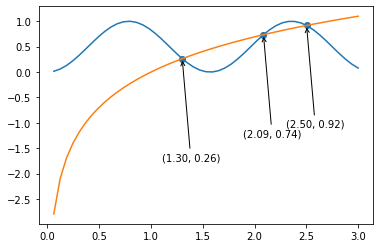

In [151]:
def f(x, lib="sympy"):
    if lib == "sympy":
        return sympy.sin(2*x)**2
    elif lib == "numpy":
        return np.sin(2*x)**2
    
def g(x, lib="sympy"):
    if lib == "sympy":
        return sympy.log(x)
    elif lib == "numpy":
        return np.log(x)
    
X = np.linspace(0, 3)
X = np.delete(X, 0)

plt.plot(X, f(X, lib="numpy"))
plt.plot(X, g(X, lib="numpy"))

ax = plt.gca()

roots_x = [nsolve(Eq(f(x), g(x)), x0) for x0 in [1.5, 2, 2.5]]
roots_y = [f(root) for root in roots_x]
addPoints(ax, roots_x, roots_y, (-0.2, -2))

### Задача 3.
Решить уравнение $\sin^2(2x^2-7x+6)=3/4$ на $[3, 4]$. Построить графики левой и правой части, отметить точки пересечения графиков.

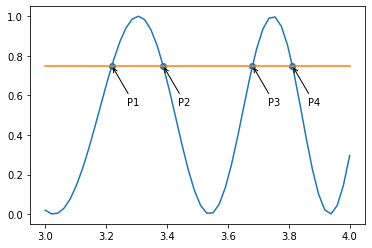

In [207]:
def f(x, lib="sympy"):
    if lib == "sympy":
        return sympy.sin(2*x**2 - 7*x + 6)**2
    elif lib == "numpy":
        return np.sin(2*x**2 - 7*x + 6)**2
    
def g(x, lib="sympy"):
    return x*0 + 3/4
    
X = np.linspace(3, 4)

plt.plot(X, f(X, lib="numpy"))
plt.plot(X, g(X, lib="numpy"))

ax = plt.gca()

roots_x = [nsolve(Eq(f(x), g(x)), x0) for x0 in [3, 3.4, 3.5, 3.7]]
roots_y = [f(root) for root in roots_x]
addPoints(ax, roots_x, roots_y, (0.05, -0.2), "char")

### Задача 4.
Решить уравнение ${\rm tg}^4(2x^2+1)-10=0$ на интервале $[0, 0.2]$ методом дихотомии. График строить не нужно.

In [209]:
def f(x):
    return sympy.tan(2*x**2 + 1)**4 - 10
    
nsolve(f(x), (0, 0.2), solver="bisect")

0.171066377483446

### Задача 5.
Решить систему уравнений 
$$
\left\{\begin{matrix}
(x - 1)^2 + (y - 2)^2 + (z + 3)^2 = 25\\
x + y + z = 0\\
-2x + 3y - z = 7
\end{matrix}\right.
$$
начальное приближение (0, 0, 0).
Проверить подстановкой.

In [270]:
Eqs = [
    Eq((x - 1)**2 + (y - 2)**2 + (z + 3)**2, 25),
    Eq(x + y + z, 0),
    Eq(-2*x + 3*y - z, 7)
]

sol = nsolve(Eqs, (x, y, z), (0, 0, 0))
values = ((x, sol[0]), (y, sol[1]), (z, sol[2]))

display(sol)
    
[e.subs(values) for e in Eqs]

Matrix([
[-2.08606699924184],
[ 1.22848325018954],
[0.857583749052298]])

[True, False, True]

### Индивидуальное задание (Вариант 11)
Построить графики функций $f(x)$ и $g(x)$, уточнить координаты точек пересечения, решая численно соответствующее уравнение. На  графике отметить и подписать буквами $А_1$, $A_2$, ... точки пересечения графиков.  

\begin{align*}
 f(x) = - \frac{x^{2}}{16} + \frac{7 x}{8} + \frac{35}{16}\\
 g(x) = \frac{5 x^{2}}{16} + \frac{x}{8} - \frac{55}{16}
\end{align*}

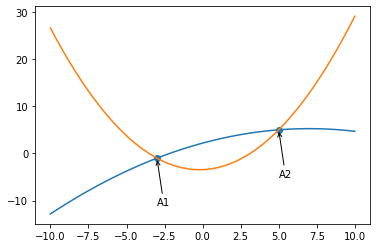

In [278]:
def f(x):
    return -x**2/16 + 7*x/8 + 35/16
    
def g(x):
    return 5*x**2/16 + x/8 - 55/16
    
X = np.linspace(-10, 10)

plt.plot(X, f(X))
plt.plot(X, g(X))

ax = plt.gca()

roots_x = [nsolve(Eq(f(x), g(x)), x0) for x0 in [-2.5, 5]]
roots_y = [f(root) for root in roots_x]
addPoints(ax, roots_x, roots_y, (0, -10), "char")